# **IMPUTE MISSING VALUES**

#### IMPORT REQUIRED LIBRARIES

In [ ]:
import pandas as pd

#### LOAD DATASET

In [ ]:
# Load Dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

In [ ]:
# Display the first 5 rows
df.head()

#### REMOVE DUPLICATES

In [ ]:
# Count duplicates
print(f"Number of duplicates: {df.duplicated(subset=['ResponseId']).sum()}")

In [ ]:
# Remove duplicates
df.drop_duplicates(subset=['ResponseId'], inplace=True)

# Verify number of duplicates after removal
print(f"Number of duplicates: {df.duplicated(subset=['ResponseId']).sum()}")

#### FINDING MISSING VALUES

In [ ]:
# Find missing values for all columns
miss_values = df.isna().sum()

print(miss_values[miss_values > 0].to_string())

In [ ]:
# Count missing values in 'RemoteWork' column
print(f"Number of missing remote work data: {df['RemoteWork'].isna().sum()}")

#### IMPUTING MISSING VALUES

In [ ]:
# Find the most frequent value in 'RemoteWork' column
mode_RW = df['RemoteWork'].mode()[0]

print(f"The most frequent remote work is '{mode_RW}'")

In [ ]:
# Impute (replace) all empty rows in 'RemoteWork' column with the mode
df['RemoteWork'].fillna(mode_RW, inplace=True)

# Verify number of null after imputing
print(f"Number of null after imputing: {df['RemoteWork'].isna().sum()}")

#### VISUALIZE COMPENSATION RELATED COLUMNS

In [ ]:
# Find Compensation related column
df.filter(like='Comp')

In [ ]:
# ---Handle missing values for 'ConvertedCompYearly' column---

# Median is better for this type of data instead of mean
avg_comp = df['ConvertedCompYearly'].median()

# Fill missing values with median
df['ConvertedCompYearly'].fillna(avg_comp, inplace=True)

# Verify
print(f"Number of missing compensation data: {df['ConvertedCompYearly'].isna().sum()}")

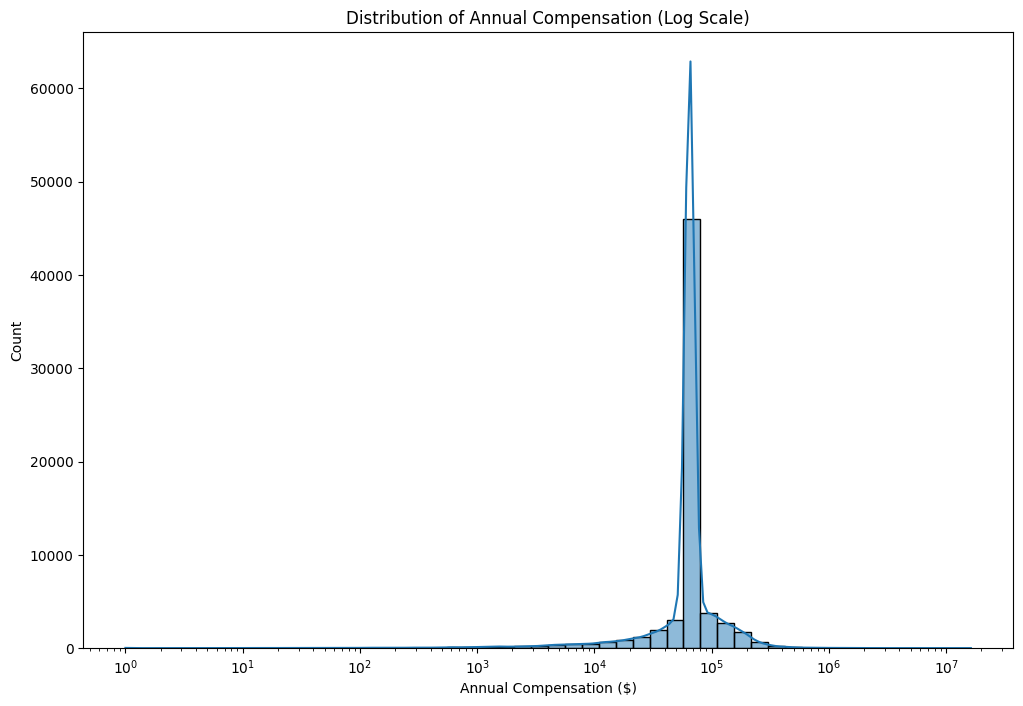

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# ---Histogram---
# Let's see data distribution for annual compensation
plt.figure(figsize=(12,8))

sns.histplot(df['ConvertedCompYearly'], bins=50, kde=True, log_scale=True)
plt.title("Distribution of Annual Compensation (Log Scale)")
plt.xlabel("Annual Compensation ($)")
plt.ylabel("Count")
plt.show()

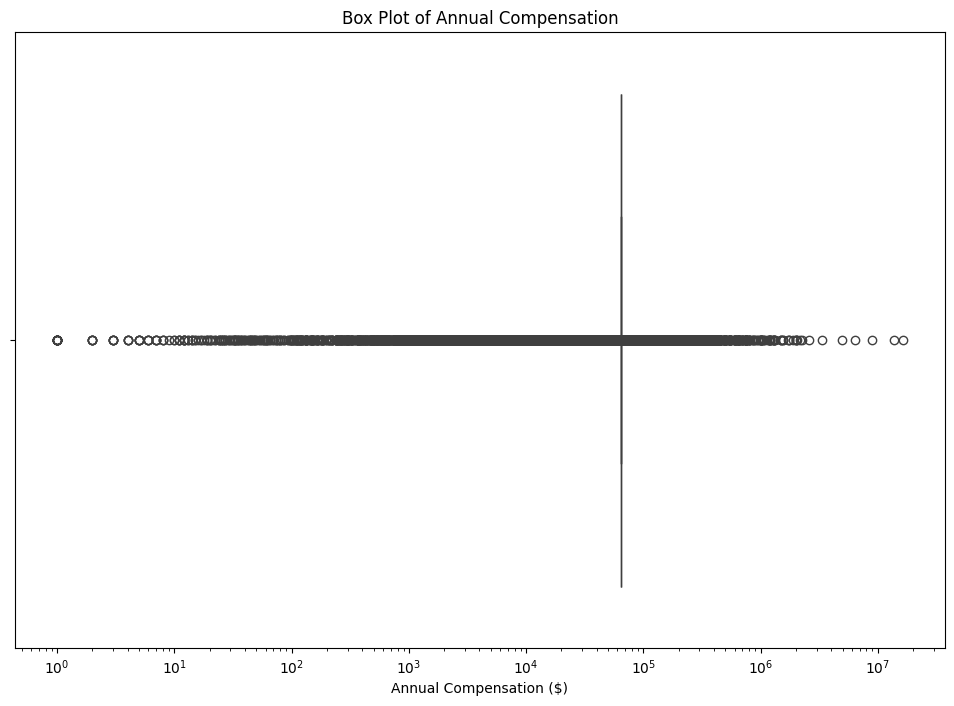

In [21]:
# ---BOX PLOT---
# Let's see outliers

plt.figure(figsize=(12,8))
sns.boxplot(x=df['ConvertedCompYearly'])
plt.title("Box Plot of Annual Compensation")
plt.xlabel("Annual Compensation ($)")
plt.xscale('log') # log scale makes it readable
plt.show()